In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Pendulum:

    def __init__(self):

        self.angle1 = float(input("Angle1:"))
        self.angle2 = float(input("Angle2:"))
        self.mass1 = float(input("Mass1:"))
        self.mass2 = float(input("Mass2:"))
        self.a_velocity1 = 0
        self.a_velocity2 = 0
        self.a_acceleration1 = 0
        self.a_acceleration2 = 0
        self.x_coordinates = []
        self.y_coordinates = []


    def move(self):

        g = 9.82
        length1 = 1
        length2 = 1
        dt = 0.0009

        term1 = -g * np.sin(self.angle1) * ((2 * self.mass1) + self.mass2)
        term2 = -self.mass2 * g * np.sin(self.angle1 - (2 * self.angle2))
        term3 = -2 * self.mass2 * np.sin(self.angle1 - self.angle2)
        term4 = (((self.a_velocity2 ** 2) * length2) + ((self.a_velocity1 ** 2) * length1 * np.cos(self.angle1 - self.angle2)))
        term5 = length1 * ((2 * self.mass1) + self.mass2)
        term6 = -self.mass2 * length1 * np.cos(2 * (self.angle1 - self.angle2))
        term7 = 2 * np.sin(self.angle1 - self.angle2)
        term8 = (self.a_velocity1 ** 2) * length1 * (self.mass1 + self.mass2)
        term9 = g * np.cos(self.angle1) * (self.mass1 + self.mass2)
        term10 = (self.a_velocity2 ** 2) * length2 * self.mass2 * np.cos(self.angle1 - self.angle2)
        term11 = length2 * ((2 * self.mass1) + self.mass2)
        term12 = -length2 * self.mass2 * np.cos(2 * (self.angle1 - self.angle2))

        self.a_acceleration1 = (term1 + term2 + (term3 * term4)) / (term5 + term6)
        self.a_acceleration2 = (term7 * (term8 + term9 + term10)) / (term11 + term12)
        self.a_velocity1 += (self.a_acceleration1 * dt)
        self.a_velocity2 += self.a_acceleration2 * dt
        self.angle1 += (self.a_velocity1 * dt)
        self.angle2 += (self.a_velocity2 * dt)
        
        x1 = 500 + 200 * np.sin(self.angle1)
        y1 = 500 + 200 * np.cos(self.angle1)
        x2 = 200 * np.sin(self.angle2)
        y2 = 200 * np.cos(self.angle2)
        
        self.x_coordinates.append(x1 + x2)
        self.y_coordinates.append(-y1 - y2)

In [3]:
double_pendulum1 = Pendulum()
double_pendulum2 = Pendulum()

x_v = []
y_v = []

for i in range(100000):
    
    double_pendulum1.move()
    double_pendulum2.move()
    
    distance = np.sqrt(((double_pendulum2.y_coordinates[i] - double_pendulum1.y_coordinates[i]) ** 2) + ((double_pendulum2.x_coordinates[i] - double_pendulum1.x_coordinates[i]) ** 2))
    
    x_v.append(i)
    y_v.append(distance)

Angle1:1
Angle2:2
Mass1:1
Mass2:1
Angle1:1
Angle2:2.0000001
Mass1:1
Mass2:1


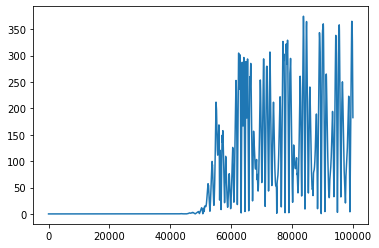

In [4]:
plt.plot(x_v, y_v)
plt.show()